In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import pickle
df = pd.read_csv('Crop_recommendation.csv')




In [35]:
print(f"Number of rows, column in Dataset = {df.shape}")
df.head(10)

Number of rows, column in Dataset = (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
5,69,37,42,23.058049,83.370118,7.073454,251.055000,1
6,69,55,38,22.708838,82.639414,5.700806,271.324860,1
7,94,53,40,20.277744,82.894086,5.718627,241.974195,1
8,89,54,38,24.515881,83.535216,6.685346,230.446236,1
9,68,58,38,23.223974,83.033227,6.336254,221.209196,1


In [3]:
df.info()
print("________________________________________________")
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
________________________________________________


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.duplicated().sum()
print("________________________________________________")
df.describe()

________________________________________________


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [36]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
df['crop_num']=  df['label'].map(crop_dict)

KeyError: 'label'

In [7]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [8]:
df.drop(['label'],axis=1,inplace=True)
df.head(200)

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
195,90,57,24,18.928519,72.800861,6.158860,82.341629,2
196,67,35,22,23.305468,63.246480,6.385684,108.760300,2
197,60,54,19,18.748267,62.498785,6.417820,70.234016,2
198,83,58,23,19.742133,59.662631,6.381202,65.508614,2


In [38]:
X = df.drop(['crop_num'],axis=1)
y = df['crop_num']

In [10]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [11]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [12]:
print(f"X shape: {X.shape} and Y shape: {y.shape}")

X shape: (2200, 7) and Y shape: (2200,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,N,P,K,temperature,humidity,ph,rainfall
1102,21,26,27,27.003155,47.675254,5.699587,95.851183
1159,29,35,28,28.347161,53.539031,6.967418,90.402604
141,60,44,23,24.794708,70.045567,5.722580,76.728601
1004,80,77,49,26.054330,79.396545,5.519088,113.229737
2,60,55,44,23.004459,82.320763,7.840207,263.964248
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [14]:
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)
print("Scaling done: ")


Scaling done: 


In [15]:
X_train

array([[0.15      , 0.15      , 0.11      , ..., 0.38971557, 0.34132491,
        0.27135565],
       [0.20714286, 0.21428571, 0.115     , ..., 0.45813084, 0.53848884,
        0.25177055],
       [0.42857143, 0.27857143, 0.09      , ..., 0.65071988, 0.34490059,
        0.20261886],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]], shape=(1540, 7))

In [16]:
#logistic
lr=LogisticRegression()
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)
acc_lr=accuracy_score(y_test,ypred)
print(f"Logistic Regression with accuracy : {accuracy_score(y_test,ypred)}")
print("Confusion matrix : ",confusion_matrix(y_test,ypred))


Logistic Regression with accuracy : 0.9287878787878788
Confusion matrix :  [[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  1  0  0 27  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0

In [31]:
#random forest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
acc_rf=accuracy_score(y_test,ypred)
print(f"Random Forest with accuracy : {accuracy_score(y_test,ypred)}")
print("Confusion matrix : ",confusion_matrix(y_test,ypred))


Random Forest with accuracy : 0.9924242424242424
Confusion matrix :  [[23  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

Feature ranking:
Feature 6: 0.2335
Feature 4: 0.2041
Feature 2: 0.1690
Feature 1: 0.1534
Feature 0: 0.1022
Feature 3: 0.0782
Feature 5: 0.0594


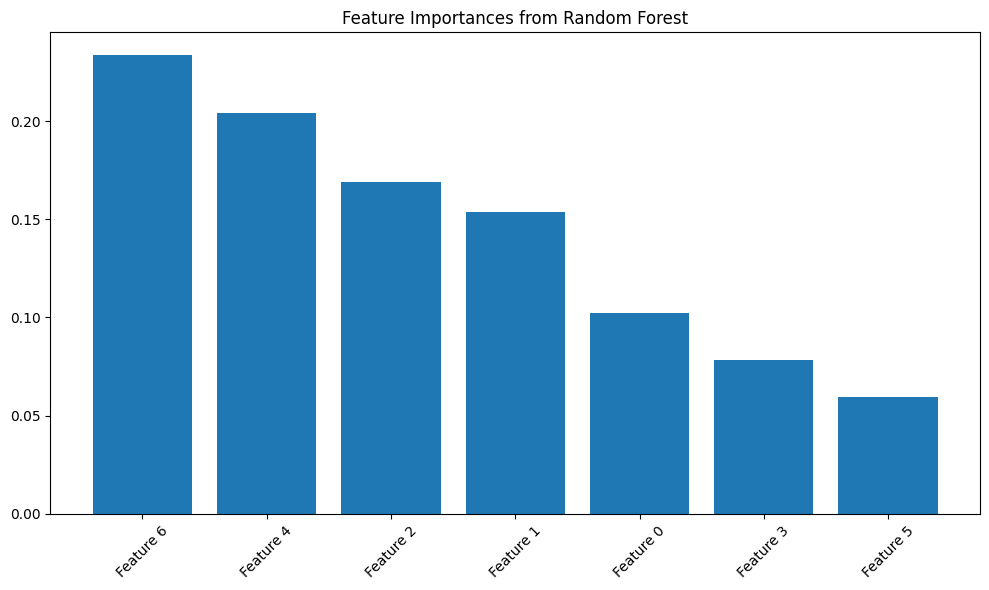

In [ ]:
importances = rf.feature_importances_

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

#importance bar chrt
plt.figure(figsize=(10, 6))
plt.title('Feature Importances from Random Forest')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# #XGBOOST
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

xgb = XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=100)
xgb.fit(X_train, y_train_adjusted)
ypred = xgb.predict(X_test)

ypred_original = ypred + 1
acc_xgb=accuracy_score(y_test_adjusted, ypred)
print(f"XGboost with accuracy : {accuracy_score(y_test_adjusted, ypred)}")
print("Confusion matrix : ",confusion_matrix(y_test_adjusted, ypred))



XGboost with accuracy : 0.9833333333333333
Confusion matrix :  [[22  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0

In [20]:
#decision tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
ypred = dt.predict(X_test)
acc_dt=accuracy_score(y_test,ypred)
print(f"Decision Tree with accuracy : {accuracy_score(y_test,ypred)}")
print("Confusion matrix : ",confusion_matrix(y_test,ypred))

Decision Tree with accuracy : 0.9833333333333333
Confusion matrix :  [[23  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 31  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [21]:
#Support Vector Machine
svm=SVC()
svm.fit(X_train,y_train)
ypred = svm.predict(X_test)
acc_svm=accuracy_score(y_test,ypred)
print(f"Support Vector Machine with accuracy : {accuracy_score(y_test,ypred)}")
print("Confusion matrix : ",confusion_matrix(y_test,ypred))

Support Vector Machine with accuracy : 0.9727272727272728
Confusion matrix :  [[19  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

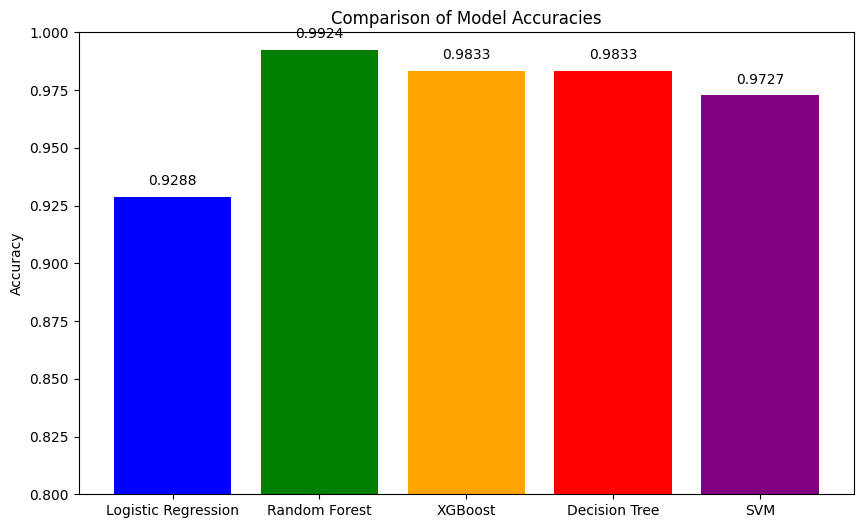

In [ ]:
#accuracy comparison 
accuracies = [acc_lr,acc_rf,acc_xgb,acc_dt,acc_svm]
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree', 'SVM']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim([0.8, 1])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{acc:.4f}', ha='center')

plt.show()


In [ ]:
def predict_crop(features, model, scaler, crop_dict):
    label_to_crop = {v: k for k, v in crop_dict.items()}
    
    features = np.array(features).reshape(1, -1)
    
    scaled_features = scaler.transform(features)
    
    pred_label = model.predict(scaled_features)[0]
    
    pred_label_int = int(pred_label)
    
    return label_to_crop[pred_label_int]


In [ ]:
input_features = [90,42,43,20.879744	,82.002744	,6.502985,	202.935536] # ex input
crop_prediction = predict_crop(input_features, rf, ms, crop_dict)
print("Recommended Crop:", crop_prediction)


Recommended Crop: rice


d:\B.Tech-CSE And BS\3rd year\mini project\project_codes\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
rf = RandomForestClassifier(random_state=42)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)


cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

print(f"Repeated Stratified 5-Fold CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

print("All CV Scores:", cv_scores)



Repeated Stratified 5-Fold CV Accuracy: 0.9958 ± 0.0030
All CV Scores: [0.99772727 0.99318182 1.         0.99772727 0.99090909 0.99318182
 0.99318182 0.99772727 1.         0.99318182 0.99318182 0.99318182
 0.99545455 0.99772727 1.        ]


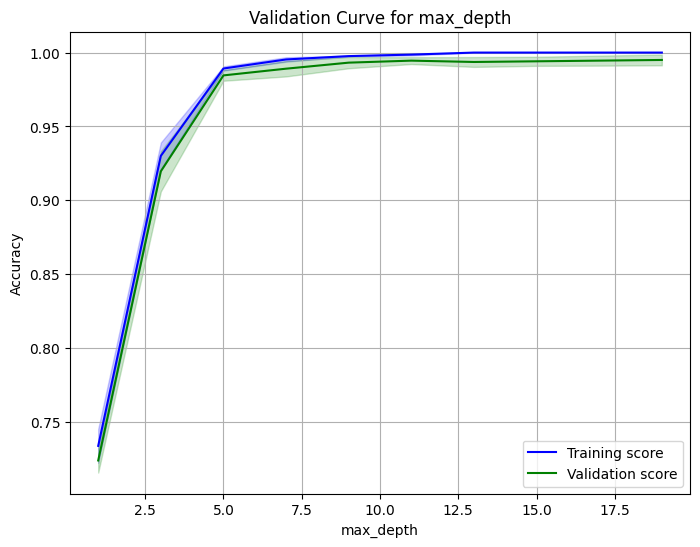

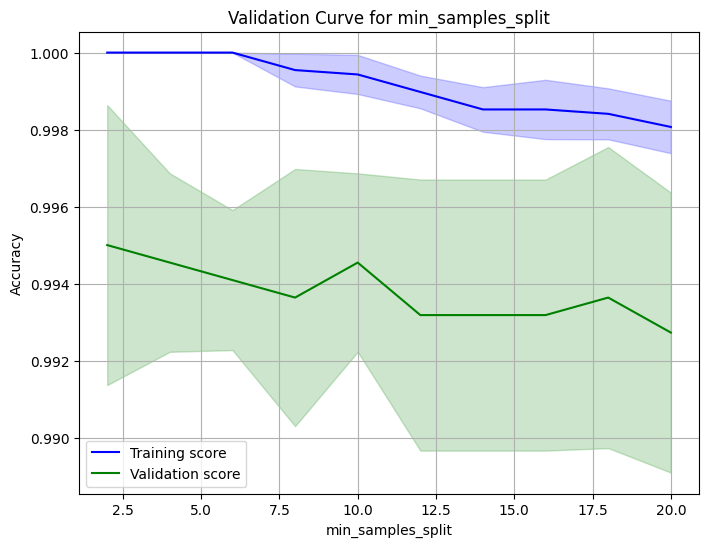

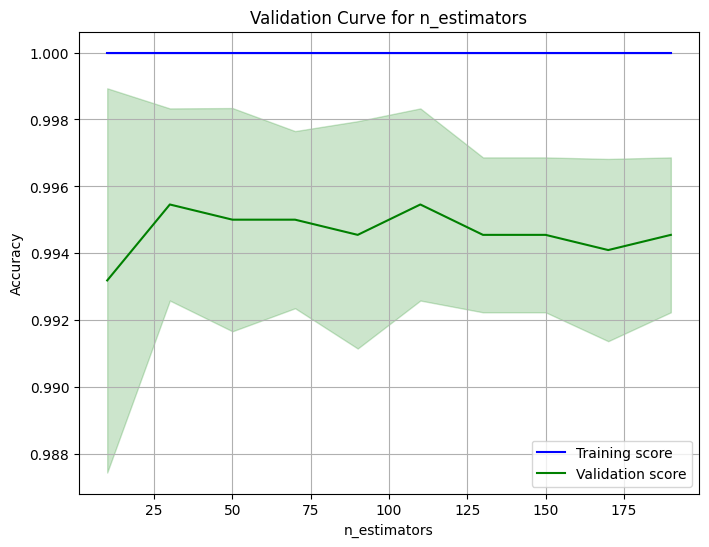

In [ ]:


def plot_validation_curve(param_name, param_range, X, y):
    rf = RandomForestClassifier(random_state=42)
    train_scores, val_scores = validation_curve(
        rf, X, y, param_name=param_name, param_range=param_range,
        cv=5, scoring='accuracy', n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(param_range, train_mean, label='Training score', color='blue')
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.plot(param_range, val_mean, label='Validation score', color='green')
    plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')
    plt.title(f'Validation Curve for {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

max_depth_range = np.arange(1, 21, 2)
plot_validation_curve('max_depth', max_depth_range, X, y)

min_samples_split_range = np.arange(2, 21, 2)
plot_validation_curve('min_samples_split', min_samples_split_range, X, y)

n_estimators_range = np.arange(10, 210, 20)
plot_validation_curve('n_estimators', n_estimators_range, X, y)


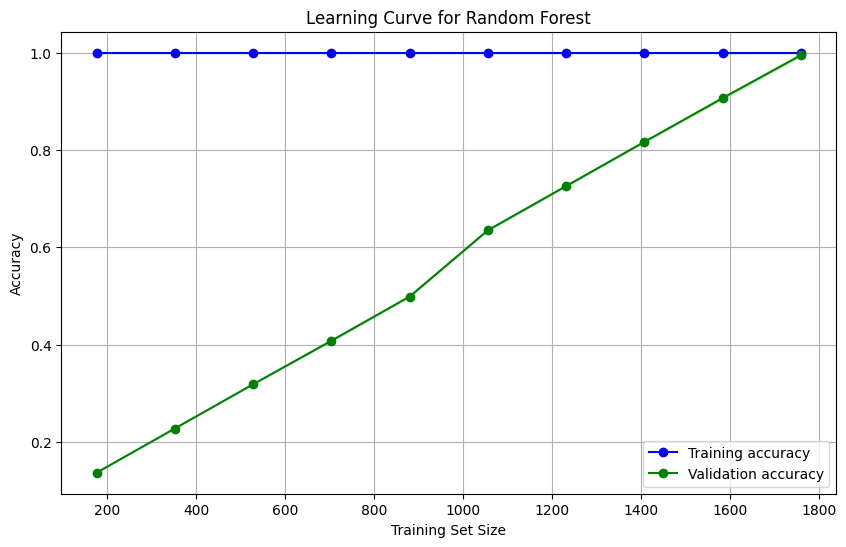

In [ ]:

# Initialize rf model
rf = RandomForestClassifier(random_state=42)

#learning curve5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#mean and std for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:

# Save model
with open('rf_for_crop_recc.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Save scaler
with open('scaler_for_crop_recc.pkl', 'wb') as f:
    pickle.dump(ms, f)

# Save reversed dictionary
label_to_crop = {v: k for k, v in crop_dict.items()}
with open('label_mapping_for_crop_recc.pkl', 'wb') as f:
    pickle.dump(label_to_crop, f)
